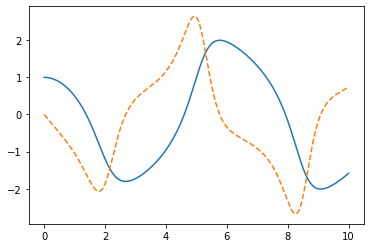

In [1]:
from pyodesys.symbolic import SymbolicSys
import matplotlib.pyplot as plt

def f(t,y,p):
    return [y[1], -y[0] + p[0]*y[1]*(1 - y[0]**2)]
odesys = SymbolicSys.from_callback(f, 2, 1)
xout, yout, info = odesys.integrate(10, [1, 0], [1], integrator='odeint', nsteps=1000)
_ = odesys.plot_result()
plt.show()

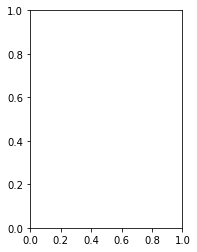

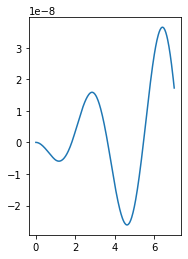

In [9]:
import sympy as sp
import numpy as np
t, u, v, k  = sp.symbols('t u v k')
dudt = v
dvdt = -k*u  # differential equations for a harmonic oscillator
odesys = SymbolicSys([(u, dudt), (v, dvdt)], t, [k])
result = odesys.integrate(7, {u: 2, v: 0}, {k: 3}, integrator='odeint',nsteps=1000)
_ = plt.subplot(1, 2, 1)
_ = result.plot()
_ = plt.subplot(1, 2, 2)
_ = plt.plot(result.xout, 2*np.cos(result.xout*3**0.5) - result.yout[:, 0])
plt.show()  # doctest: +SKIP

The algorithm converged to the desired accuracy.


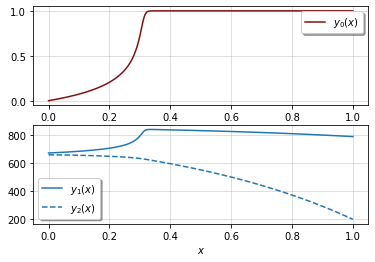

In [5]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt


def fun(x, y):
    t1 = np.exp(-19846/y[1])*(1 - y[0])
    dy21 = y[2] - y[1]
    return np.vstack((3.769911184e12*t1,
                      0.2056315191*dy21 + 6.511664773e14*t1,
                      1.696460033*dy21))

def bc(ya, yb):
    return np.array([ya[0], ya[1] - 673, yb[2] - 200])


n = 25
x = np.linspace(0, 1, n)
y = np.array([x, np.full_like(x, 673), np.linspace(800, 200, n)])

sol = solve_bvp(fun, bc, x, y)

if sol.status != 0:
    print("WARNING: sol.status is %d" % sol.status)
print(sol.message)

plt.subplot(2, 1, 1)
plt.plot(sol.x, sol.y[0], color='#801010', label='$y_0(x)$')
plt.grid(alpha=0.5)
plt.legend(framealpha=1, shadow=True)
plt.subplot(2, 1, 2)
plt.plot(sol.x, sol.y[1], '-', color='C0', label='$y_1(x)$')
plt.plot(sol.x, sol.y[2], '--', color='C0', label='$y_2(x)$')
plt.xlabel('$x$')
plt.grid(alpha=0.5)
plt.legend(framealpha=1, shadow=True)
plt.show()